# Mathematician On Earth

This code is to cleaning and analyze "mathematician" data. It contains 8500-ish mathematician with their some information.

In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import sys
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
reload(sys)  
sys.setdefaultencoding('utf8')

In [ ]:
def substring_in(X,a):
    if a in X:
        return 1
    else:
        return 0

In [ ]:
# We only have matematician_data_cleaned2.csv in the beginning. The others is the transformation of it.
!ls

In [ ]:
# quick skimming of the data
dm=pd.read_csv('matematician_data_cleaned2.csv')
dm.head()

In [ ]:
dm.columns.tolist()

In [ ]:
len(dm)

In [ ]:
# Change Column Name
dm=dm.rename(columns={'Erd\xc5\x91s number':'Erdos Number'})

In [ ]:
col_before=dm.columns.tolist()
col_after=[i.replace(' ','_') for i in col_before]

change_col=dict(zip(col_before,col_after))
dm=dm.rename(columns=change_col)

In [ ]:
# Data Validation
ml=dm.mathematicians.tolist()
my_well_known_math=['Robert G. Bartle','Leonhard Euler','Pythagoras','Andrey Kolmogorov','Thomas Bayes','Srinivasa Ramanujan']
len(set(my_well_known_math) & set(ml))==len(my_well_known_math)

#### 1. Data Uniqueness

In [10]:
len(dm.mathematicians.unique())

8595

In [11]:
# Check data uniqueness
len(dm.mathematicians)-len(dm.mathematicians.unique())

1

In [12]:
# Looking for not unique data
mate=dm.groupby('mathematicians').mathematicians.count()
mate=mate[mate>1]
mate

mathematicians
Andrey Markov    2
Name: mathematicians, dtype: int64

In [19]:
# consider the occupation, there is "jr" in occupotion. Eventhough the value of 'country_of_citizenship' in row 986 should be
# the occupation one. If you can see the whole row is shift to the right columns.
# also, as a note,Andrey Markov in these row is different person. its father and son.
dm[dm.mathematicians=='Andrey Markov']

NameError: name 'dm' is not defined

#### 2. Odd Data Position

In [199]:
dm1=dm[(dm['Unnamed:_29'].isnull())]
dm2=dm[~(dm['Unnamed:_29'].isnull())]

In [200]:
dm2.head()

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death,Unnamed:_29
767,David Crenshaw Barrow,Jr.,['mathematician'],['United States of America'],Oglethorpe County,1/11/1929,['University of Georgia'],NaN,['Athens'],NaN,...,['human'],['male'],FALSE,18,October,1852,FALSE,11,January,1929.0
900,Nicholas M. Smith,Jr.,"['physicist', 'consultant', 'computer scientist']",NaN,NaN,7-Aug-03,['University of Chicago'],NaN,NaN,NaN,...,['human'],['male'],FALSE,23,March,1914,FALSE,7,August,2003.0
968,Andrey Markov,Jr.,"['mathematician', 'topologist', 'university te...",['Soviet Union'],"Saint Petersburg, Russian Empire",11-Oct-79,['Saint Petersburg State University'],['Saint Petersburg State University'],"['Moscow', 'Russian Soviet Federative Socialis...","['Academy of Sciences of the USSR', 'Russian A...",...,['human'],['male'],FALSE,9,September,1903,FALSE,11,October,1979.0
1337,Sir John Sinclair,1st Baronet,"['economist', 'mathematician', 'politician', '...",['Kingdom of Great Britain'],Thurso,21 December 1835,"['University of Edinburgh', 'Trinity College']",NaN,['Edinburgh'],"['Faculty of Advocates', 'Royal Society', 'Roy...",...,['human'],['male'],FALSE,10,May,1754,FALSE,21,December,1835.0
1938,Frederick J. Almgren,Jr.,"['mathematician', 'university teacher']",['United States of America'],Birmingham,5-Feb-97,NaN,NaN,['Princeton'],NaN,...,['human'],['male'],FALSE,3,July,1933,FALSE,5,February,1997.0


In [201]:
col_before=dm.columns.tolist()[1:]
col_after=['occupation_old']+col_before[:-1]

change_col=dict(zip(col_before,col_after))
dm2=dm2.rename(columns=change_col)

In [202]:
dm2.head(3)

,mathematicians,occupation_old,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,...,instance_of,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death
767,David Crenshaw Barrow,Jr.,['mathematician'],['United States of America'],Oglethorpe County,1/11/1929,['University of Georgia'],NaN,['Athens'],NaN,...,['human'],['male'],FALSE,18,October,1852,FALSE,11,January,1929.0
900,Nicholas M. Smith,Jr.,"['physicist', 'consultant', 'computer scientist']",NaN,NaN,7-Aug-03,['University of Chicago'],NaN,NaN,NaN,...,['human'],['male'],FALSE,23,March,1914,FALSE,7,August,2003.0
968,Andrey Markov,Jr.,"['mathematician', 'topologist', 'university te...",['Soviet Union'],"Saint Petersburg, Russian Empire",11-Oct-79,['Saint Petersburg State University'],['Saint Petersburg State University'],"['Moscow', 'Russian Soviet Federative Socialis...","['Academy of Sciences of the USSR', 'Russian A...",...,['human'],['male'],FALSE,9,September,1903,FALSE,11,October,1979.0


In [203]:
dm2.mathematicians=dm2.mathematicians+","+dm2.occupation_old

In [204]:
del dm2['occupation_old']
# del dm1['Unnamed:_29']

In [205]:
# dm1[dm1['approx._date_of_birth'].isnull()]
# dm1['approx._date_of_birth'].unique().tolist()
dm1[dm1['approx._date_of_birth']=="['male']"]

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death,Unnamed:_29
1520,Samuel A. Schreiner,Jr.,"['cryptographer', 'engineer', 'novelist']",['United States of America'],NaN,NaN,['Princeton University'],NaN,NaN,NaN,...,['human'],['male'],FALSE,6,June,1921,FALSE,NaN,NaN,NaN
1746,John W. Dawson,Jr,"['mathematician', 'historian of mathematics']",['United States of America'],Wichita,NaN,['University of Michigan'],NaN,NaN,NaN,...,['human'],['male'],FALSE,4,February,1944,FALSE,NaN,NaN,NaN
5849,Raymond O. Wells,Jr.,['mathematician'],['United States of America'],Dallas,NaN,['New York University'],NaN,NaN,['American Mathematical Society'],...,['human'],['male'],FALSE,12,June,1940,FALSE,NaN,NaN,NaN


In [206]:
dm1[~(dm1['approx._date_of_death'].isin(['FALSE', np.nan, 'TRUE']))]

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death,Unnamed:_29
174,Jacob Tamarkin,"['mathematician', 'university teacher']","['Ukraine', 'Soviet Union', 'United States of ...",Chernihiv,18-Nov-45,['Saint Petersburg State University'],"['Brown University', '1927', 'Petersburg State...",['Bethesda'],"['American Mathematical Society', 'American Ac...","['Brown University', '1927', 'Petersburg State...",...,['male'],FALSE,11,July,1888,Fal,NaN,NaN,NaN,NaN
1520,Samuel A. Schreiner,Jr.,"['cryptographer', 'engineer', 'novelist']",['United States of America'],NaN,NaN,['Princeton University'],NaN,NaN,NaN,...,['human'],['male'],FALSE,6,June,1921,FALSE,NaN,NaN,NaN
1746,John W. Dawson,Jr,"['mathematician', 'historian of mathematics']",['United States of America'],Wichita,NaN,['University of Michigan'],NaN,NaN,NaN,...,['human'],['male'],FALSE,4,February,1944,FALSE,NaN,NaN,NaN
5849,Raymond O. Wells,Jr.,['mathematician'],['United States of America'],Dallas,NaN,['New York University'],NaN,NaN,['American Mathematical Society'],...,['human'],['male'],FALSE,12,June,1940,FALSE,NaN,NaN,NaN


In [207]:
dm11=dm1[dm1['approx._date_of_birth']=="['male']"]
dm12=dm1[~(dm1['approx._date_of_birth']=="['male']")]

In [208]:
col_before=dm.columns.tolist()
col_after=dm11.columns.tolist()[:-10]+['sex_or_gender0']+dm11.columns.tolist()[-10:][:-1]

change_col=dict(zip(col_before,col_after))
dm11=dm11.rename(columns=change_col)

In [209]:
dm11.head()

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,sex_or_gender0,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death
1520,Samuel A. Schreiner,Jr.,"['cryptographer', 'engineer', 'novelist']",['United States of America'],NaN,NaN,['Princeton University'],NaN,NaN,NaN,...,['human'],['male'],FALSE,6,June,1921,FALSE,NaN,NaN,NaN
1746,John W. Dawson,Jr,"['mathematician', 'historian of mathematics']",['United States of America'],Wichita,NaN,['University of Michigan'],NaN,NaN,NaN,...,['human'],['male'],FALSE,4,February,1944,FALSE,NaN,NaN,NaN
5849,Raymond O. Wells,Jr.,['mathematician'],['United States of America'],Dallas,NaN,['New York University'],NaN,NaN,['American Mathematical Society'],...,['human'],['male'],FALSE,12,June,1940,FALSE,NaN,NaN,NaN


In [210]:
del dm12['Unnamed:_29']
del dm11['sex_or_gender0']

In [211]:
dm_1=dm12.append(dm11)

In [212]:
dm_1.head()

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,instance_of,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death
0,Roger Joseph Boscovich,"['physicist', 'astronomer', 'mathematician', '...",['Republic of Ragusa'],"Dubrovnik, Republic of Ragusa",13 February 1787,['Pontifical Gregorian University'],['Pontifical Gregorian University'],"['Milan', 'Habsburg Empire']","['Royal Society', 'Russian Academy of Sciences...",['Pontifical Gregorian University'],...,['human'],['male'],FALSE,18,May,1711,FALSE,13,February,1787
1,Emma Previato,['mathematician'],"['United States of America', 'Italy']",Badia Polesine,NaN,"['Harvard University', 'University of Padua']","['Boston University', 'University of Padua']",NaN,['American Mathematical Society'],"['Boston University', 'University of Padua']",...,['human'],['female'],FALSE,NaN,NaN,1952,FALSE,NaN,NaN,NaN
2,Feodor Deahna,['mathematician'],NaN,NaN,1844,NaN,NaN,NaN,NaN,NaN,...,['human'],['male'],FALSE,NaN,NaN,1815,FALSE,NaN,NaN,1844
3,Denis Henrion,"['publisher', 'mathematician']",['France'],NaN,1640,NaN,NaN,NaN,NaN,NaN,...,['human'],['male'],TRUE,NaN,NaN,1500,FALSE,NaN,NaN,1640
4,Henri Delannoy,"['mathematician', 'historian', 'military perso...",['France'],Bourbonne-les-Bains,5-Feb-15,['École Polytechnique'],NaN,['Guéret'],NaN,NaN,...,['human'],['male'],FALSE,28,September,1833,FALSE,5,February,1915


In [213]:
dm2.head(2)

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,instance_of,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death
767,"David Crenshaw Barrow, Jr.",['mathematician'],['United States of America'],Oglethorpe County,1/11/1929,['University of Georgia'],NaN,['Athens'],NaN,NaN,...,['human'],['male'],FALSE,18,October,1852,FALSE,11,January,1929.0
900,"Nicholas M. Smith, Jr.","['physicist', 'consultant', 'computer scientist']",NaN,NaN,7-Aug-03,['University of Chicago'],NaN,NaN,NaN,NaN,...,['human'],['male'],FALSE,23,March,1914,FALSE,7,August,2003.0


In [214]:
dm_new=dm_1.append(dm2)

In [215]:
dm_new.head()

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,instance_of,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death
0,Roger Joseph Boscovich,"['physicist', 'astronomer', 'mathematician', '...",['Republic of Ragusa'],"Dubrovnik, Republic of Ragusa",13 February 1787,['Pontifical Gregorian University'],['Pontifical Gregorian University'],"['Milan', 'Habsburg Empire']","['Royal Society', 'Russian Academy of Sciences...",['Pontifical Gregorian University'],...,['human'],['male'],FALSE,18,May,1711,FALSE,13,February,1787
1,Emma Previato,['mathematician'],"['United States of America', 'Italy']",Badia Polesine,NaN,"['Harvard University', 'University of Padua']","['Boston University', 'University of Padua']",NaN,['American Mathematical Society'],"['Boston University', 'University of Padua']",...,['human'],['female'],FALSE,NaN,NaN,1952,FALSE,NaN,NaN,NaN
2,Feodor Deahna,['mathematician'],NaN,NaN,1844,NaN,NaN,NaN,NaN,NaN,...,['human'],['male'],FALSE,NaN,NaN,1815,FALSE,NaN,NaN,1844
3,Denis Henrion,"['publisher', 'mathematician']",['France'],NaN,1640,NaN,NaN,NaN,NaN,NaN,...,['human'],['male'],TRUE,NaN,NaN,1500,FALSE,NaN,NaN,1640
4,Henri Delannoy,"['mathematician', 'historian', 'military perso...",['France'],Bourbonne-les-Bains,5-Feb-15,['École Polytechnique'],NaN,['Guéret'],NaN,NaN,...,['human'],['male'],FALSE,28,September,1833,FALSE,5,February,1915


In [216]:
dm_new[dm_new.year_of_birth=='June']

,mathematicians,occupation,country_of_citizenship,place_of_birth,date_of_death,educated_at,employer,place_of_death,member_of,employer.1,...,instance_of,sex_or_gender,approx._date_of_birth,day_of_birth,month_of_birth,year_of_birth,approx._date_of_death,day_of_death,month_of_death,year_of_death


In [217]:
dm_new.to_csv('matematician_data_cleaned3.csv',index=0)

#### 3. Gender Composition from the Data and guess the rest of it

In [20]:
dm_new=pd.read_csv('matematician_data_cleaned3.csv')

In [25]:
len(dm_new)
dm_new.columns

Index([u'mathematicians', u'occupation', u'country_of_citizenship',
       u'place_of_birth', u'date_of_death', u'educated_at', u'employer',
       u'place_of_death', u'member_of', u'employer.1', u'doctoral_advisor',
       u'languages_spoken,_written_or_signed', u'academic_degree',
       u'doctoral_student', u'manner_of_death', u'position_held',
       u'field_of_work', u'award_received', u'Erdos_Number', u'instance_of',
       u'sex_or_gender', u'approx._date_of_birth', u'day_of_birth',
       u'month_of_birth', u'year_of_birth', u'approx._date_of_death',
       u'day_of_death', u'month_of_death', u'year_of_death'],
      dtype='object')

In [26]:
# dm3=dm_new[['mathematicians','sex_or_gender']]

In [27]:
dm3=dm_new.groupby('sex_or_gender').mathematicians.count()

In [28]:
dm3

sex_or_gender
['female', 'Italian Wikipedia']                                                                  2
['female']                                                                                     785
['h                                                                                              1
['intersex', 'female']                                                                           1
['male', 'Swedish Wikipedia', 'Virtual International Authority File', 'Italian Wikipedia']       1
['male', 'Virtual International Authority File', 'Italian Wikipedia']                            1
['male']                                                                                      7707
Name: mathematicians, dtype: int64

In [29]:
def det_gen(X):
    try:
        if 'female' in X:
            return 'female'
        elif 'male' in X:
            return 'male'
        else:
            return 'not_clear'
    except:
        return 'not_clear_2'

In [30]:
dm_new['n_gender']=dm_new.sex_or_gender.apply(det_gen)

In [31]:
dm3=dm_new.groupby('n_gender').mathematicians.count()
dm3

n_gender
female          788
male           7709
not_clear         1
not_clear_2      98
Name: mathematicians, dtype: int64

In [32]:
dm_new[dm_new.n_gender=='not_clear']['sex_or_gender'].unique().tolist()

["['h"]

In [33]:
dm_new[dm_new.n_gender=='not_clear'][['mathematicians','sex_or_gender']]

,mathematicians,sex_or_gender
1642,William Thomson,['h


In [34]:
dm_new['n_gender']=dm_new.n_gender.replace('not_clear','male')

In [35]:
dm3=dm_new.groupby('n_gender').mathematicians.count()
dm3

n_gender
female          788
male           7710
not_clear_2      98
Name: mathematicians, dtype: int64

In [36]:
dm_new[dm_new.n_gender=='not_clear_2']['sex_or_gender'].unique().tolist()

[nan]

In [38]:
# dm_new.to_csv('matematician_data_cleaned3_1.csv',index=0)

### 4. Age of Mathematician 

In [22]:
dm_new4=pd.read_csv('matematician_data_cleaned3_1.csv')

In [238]:
dm_new4.year_of_death=dm_new4.year_of_death.apply(lambda x: str(x).replace('s',''))
dm_new4.year_of_birth=dm_new4.year_of_birth.apply(lambda x: str(x).replace('s',''))
dm_new4['Approx_Age']=dm_new4.year_of_death.astype(float)-dm_new4.year_of_birth.astype(float)
# dm_new4.to_csv('matematician_data_cleaned4_1.csv',index=0)

In [44]:
# dm_new42.year_of_birth.unique()

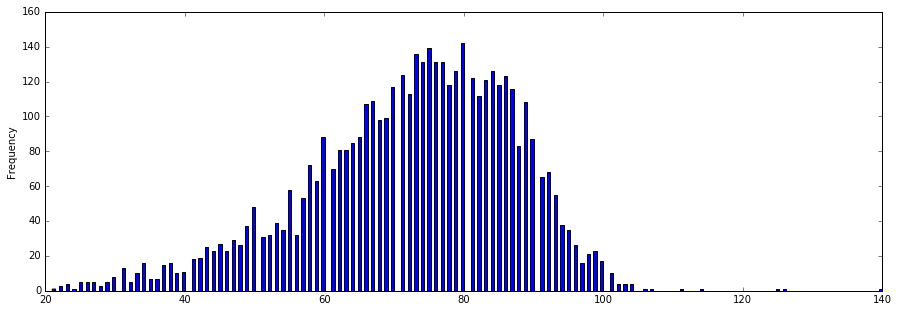

In [45]:
# dm_new4.Approx_Age.plot(kind='hist',figsize=(15,5),bins=500)
dm_new4[(dm_new4.Approx_Age>20)&(dm_new4.year_of_birth.astype(float)>500)].Approx_Age.plot(kind='hist',figsize=(15,5),bins=250)

In [46]:
# dm_new4[(dm_new4.Approx_Age>=100) & (dm_new4.Approx_Age>0)]

In [47]:
dm_new42=dm_new4[(dm_new4.Approx_Age>20)&(dm_new4.year_of_birth.astype(float)>500)]

In [48]:
str(dm_new42.Approx_Age.mean())+'+-'+str(dm_new42.Approx_Age.std())

'72.4254771606+-14.8620559283'

In [49]:
dm_new42.year_of_birth=dm_new42.year_of_birth.astype(float)
dm_new42['Approx_Age2']=dm_new42.Approx_Age
dm_age=dm_new42.groupby('year_of_birth').agg({'Approx_Age':np.mean,'mathematicians':np.size})

c:\users\aska\anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
len(dm_new42)

4663

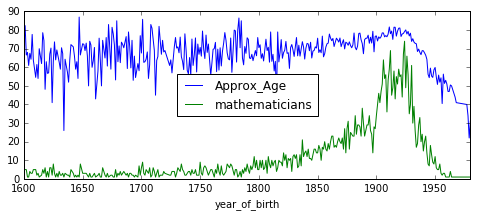

In [51]:
dm_age[1600:].plot(figsize=(8,3))

In [17]:
dm_new42.n_gender.value_counts()

male           4390
female          270
not_clear_2       3
Name: n_gender, dtype: int64

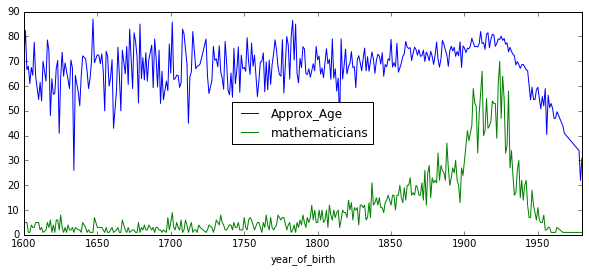

In [18]:
dm_age_M=dm_new42[dm_new42.n_gender=='male'].groupby('year_of_birth').agg({'Approx_Age':np.mean,'mathematicians':np.size})
dm_age_M[1600:].plot(figsize=(10,4))

In [19]:
dm_new42[(dm_new42.n_gender=='male')&
         (dm_new42.year_of_birth>=1600)].groupby('n_gender').agg({'Approx_Age':np.mean,'Approx_Age2':np.std,'mathematicians':np.size})

,Approx_Age2,Approx_Age,mathematicians
n_gender,,,
male,14.549426,72.595792,4040


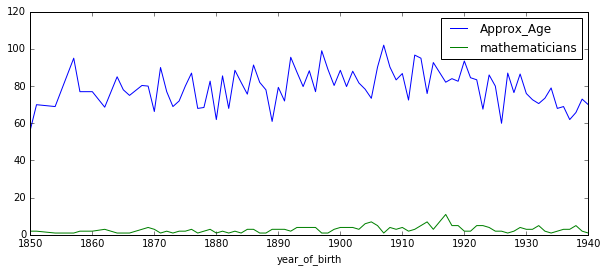

In [53]:
dm_age_W=dm_new42[dm_new42.n_gender=='female'].groupby('year_of_birth').agg({'Approx_Age':np.mean,'mathematicians':np.size})
# dm_age_W[1600:].plot(figsize=(10,4))
dm_age_W[1850:1940].plot(figsize=(10,4))

In [21]:
dm_new42[(dm_new42.n_gender=='female')&
         (dm_new42.year_of_birth>=1850)&
         (dm_new42.year_of_birth<=1940)].groupby('n_gender').agg({'Approx_Age':np.mean,'Approx_Age2':np.std,'mathematicians':np.size})

,Approx_Age2,Approx_Age,mathematicians
n_gender,,,
female,14.045068,79.612766,235


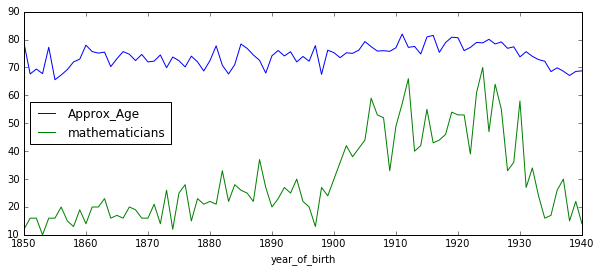

In [22]:
dm_age_M[1850:1940].plot(figsize=(10,4))

In [23]:
dm_new42[(dm_new42.year_of_birth>=1850)&
         (dm_new42.year_of_birth<=1940)].groupby('n_gender').agg({'Approx_Age':np.mean,'Approx_Age2':np.std,'mathematicians':np.size})

,Approx_Age2,Approx_Age,mathematicians
n_gender,,,
female,14.045068,79.612766,235
male,13.815466,75.325446,2747
not_clear_2,3.535534,85.500000,2


### 5. Country Citizenship

In [26]:
dm_new5=pd.read_csv('matematician_data_cleaned4_1.csv')

In [28]:
dm_new5.columns

Index([u'mathematicians', u'occupation', u'country_of_citizenship',
       u'place_of_birth', u'date_of_death', u'educated_at', u'employer',
       u'place_of_death', u'member_of', u'employer.1', u'doctoral_advisor',
       u'languages_spoken,_written_or_signed', u'academic_degree',
       u'doctoral_student', u'manner_of_death', u'position_held',
       u'field_of_work', u'award_received', u'Erdos_Number', u'instance_of',
       u'sex_or_gender', u'approx._date_of_birth', u'day_of_birth',
       u'month_of_birth', u'year_of_birth', u'approx._date_of_death',
       u'day_of_death', u'month_of_death', u'year_of_death', u'n_gender',
       u'Approx_Age'],
      dtype='object')

In [40]:
dm_new52=dm_new5[(dm_new5.year_of_birth>=1850)&(dm_new5.year_of_birth<=1940)]
# dm_new52=dm_new5[(dm_new5.year_of_birth<1850)]

In [41]:
len(dm_new52)

3787

In [42]:
dm_new53=dm_new52.groupby('country_of_citizenship').mathematicians.count().reset_index()
dm_new53.country_of_citizenship=dm_new53.country_of_citizenship.apply(lambda x: ast.literal_eval(x))
ctry_list=dm_new53.country_of_citizenship.tolist()
all_ctry=[]
for c in ctry_list:
    all_ctry=list(set(all_ctry+c))

In [43]:
# ['1948','1929','1950s','1891']
all_ctry,len(all_ctry)

(['Canada',
  'Lithuania',
  'Kingdom of Serbs, Croatians and Slovenes',
  'Federal Republic of Yugoslavia',
  'Argentina',
  'Cameroon',
  'British Indian',
  '1948',
  'Slovenia',
  'Spain',
  'Vietnam',
  'Czechoslovak Socialist Republic',
  'Soviet people',
  'Russian Soviet Federative Socialist Republic',
  "People's Republic of China",
  'Kingdom of Romania',
  'Nazi Germany',
  'New Zealand',
  'Pakistan',
  'Albania',
  'England',
  'mathematician',
  'statelessness',
  'Azerbaijan',
  'Weimar Republic',
  'Tajikistan',
  'Turkey',
  'Bangladesh',
  'India',
  'France',
  'Slovakia',
  '1929',
  'novelist',
  'Norway',
  'Cuba',
  'United States of America',
  'Togo',
  'China',
  'Armenia',
  'Kingdom of Italy',
  'Ukraine',
  'Ghana',
  'Indonesia',
  'Finland',
  'German Confederation',
  'Sweden',
  'Belarus',
  'Russia',
  'German Empire',
  'Romania',
  'Portugal',
  'South Africa',
  'Austria',
  'Socialist Federal Republic of Yugoslavia',
  'Hungary',
  'cryptographer',

In [44]:
all_ctry2=list(set(all_ctry)-set(['1948','1929','1950s','1891']))
len(all_ctry2)

114

In [45]:
dm_new52['country_of_citizenship']=dm_new52['country_of_citizenship'].fillna('-')

# def country_in(X,a):
#     if a in X:
#         return 1
#     else:
#         return 0

# ctr='1891'
all_ctry2_m=pd.DataFrame()
for ctr in all_ctry2:
#     ctr=c
    dm_new52['in_country_'+ctr]=dm_new52['country_of_citizenship'].apply(lambda x: substring_in(x,ctr))
#     dm_new52[dm_new52['in_country_'+ctr]==1]['country_of_citizenship'].tolist()
    dnm=dm_new52[dm_new52['in_country_'+ctr]==1][['mathematicians','year_of_birth']]
    del dm_new52['in_country_'+ctr]
    dnm['citizenship']=ctr
    all_ctry2_m=all_ctry2_m.append(dnm)

c:\users\aska\anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\aska\anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
all_ctry2_m.head()

,mathematicians,year_of_birth,citizenship
18,Joseph Lipman,1938.0,Canada
67,Jack Edmonds,1934.0,Canada
232,Ivan M. Niven,1915.0,Canada
310,Gert Sabidussi,1929.0,Canada
767,Anton Kotzig,1919.0,Canada


In [47]:
d_country=all_ctry2_m.groupby('citizenship').mathematicians.count()
d_country=d_country.sort_values(ascending=0)

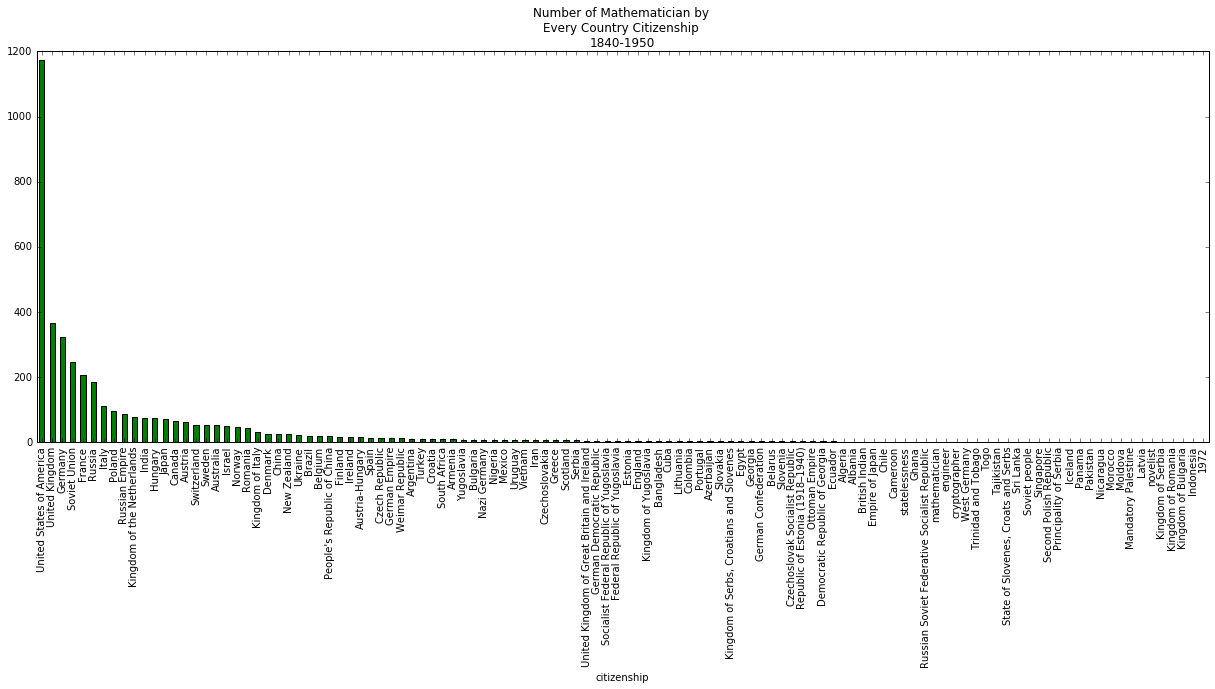

In [48]:
d_country.plot(kind='bar',figsize=(21,7),title='Number of Mathematician by \nEvery Country Citizenship \n1840-1950',color='g')

In [49]:
ctr='Indonesia'
dm_new52['in_country_'+ctr]=dm_new52['country_of_citizenship'].apply(lambda x: substring_in(x,ctr))
dm_new52[dm_new52['in_country_'+ctr]==1].transpose()

c:\users\aska\anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,5503
mathematicians,Moedomo Soedigdomarto
occupation,['university teacher']
country_of_citizenship,['Indonesia']
place_of_birth,NaN
date_of_death,5-Nov-05
educated_at,"['Institut Teknologi Bandung', 'University of ..."
employer,NaN
place_of_death,NaN
member_of,NaN
employer.1,NaN


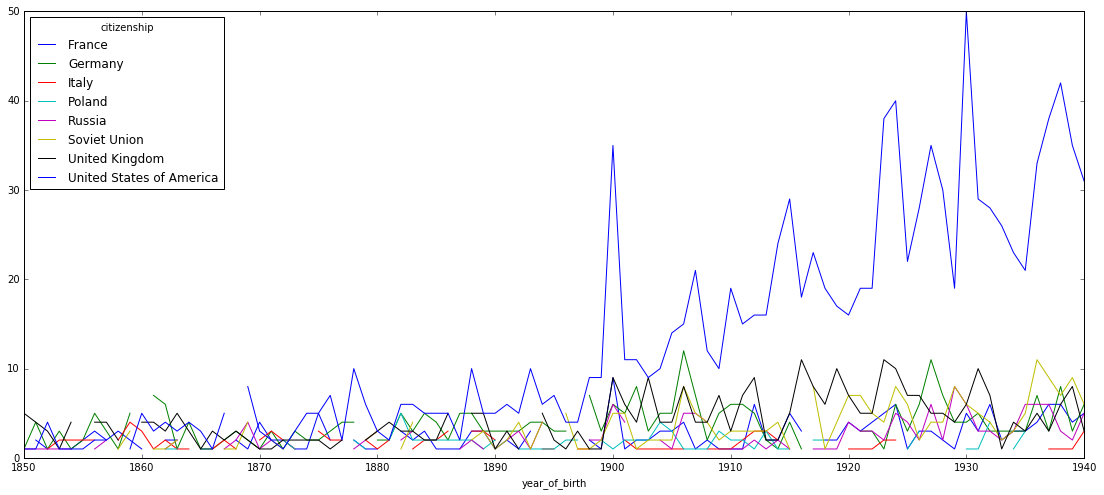

In [50]:
dcc=d_country[:8].index.tolist()
d_country2=all_ctry2_m[all_ctry2_m.citizenship.isin(dcc)].groupby(['citizenship','year_of_birth']).mathematicians.count()
d_country2.unstack().transpose().plot(figsize=(19,8))

### 6. Fields of the mathematician

In [211]:
dm_new6=pd.read_csv('matematician_data_cleaned4_1.csv')

In [212]:
dm_new62=dm_new6[(dm_new6.year_of_birth>=1850)&
         (dm_new6.year_of_birth<=1940)]

In [213]:
dm_new62_g=dm_new62.groupby('field_of_work').mathematicians.count().reset_index()
dm_new62_g['field_of_work2']=dm_new62_g.field_of_work.apply(lambda x: ast.literal_eval(x))
fow_list=dm_new62_g.field_of_work2.tolist()
all_fow=[]
for f in fow_list:
    all_fow=list(set(all_fow+f))

In [214]:
all_fow

['theory of differential equations',
 'biostatistics',
 'Alcohol dependence',
 'evolutionary biology',
 'Health physics',
 'computational geometry',
 'linguistics',
 'differential equation',
 'statistical physics',
 'approximation theory',
 'control theory',
 'lattice',
 'representation theory',
 'operational calculus',
 'Dirichlet problem',
 'graph theory',
 'cryptography',
 'Elliptic partial differential equation',
 'physical cosmology',
 'differential topology',
 'coding theory',
 'topological algebra',
 'Oscillation theory',
 'Structural mechanics',
 'mathematical biology',
 'integral equation',
 'operator theory',
 'Q3968',
 'demography',
 'set theory',
 'mathematical logic',
 'vector algebra',
 'non-standard analysis',
 'numerical analysis',
 'aerodynamics',
 'potential theory',
 'crystallography',
 'rheology',
 'genetics',
 'Markov process',
 'atomic physics',
 'Metamathematics',
 'mathematical statistics',
 'complex geometry',
 'quality management',
 'differential calculus',
 '

In [221]:
dm_new62.field_of_work=dm_new62.field_of_work.fillna('-')
all_fow2_m=pd.DataFrame()
for fw in all_fow:
#     ctr=c
    dm_new62['fow_'+fw]=dm_new62['field_of_work'].apply(lambda x: substring_in(x,fw))
#     dm_new52[dm_new52['in_country_'+ctr]==1]['country_of_citizenship'].tolist()
    dnm=dm_new62[dm_new62['fow_'+fw]==1][['mathematicians','year_of_birth']]
    del dm_new62['fow_'+fw]
    dnm['field']=fw
#     print len(dnm)
    all_fow2_m=all_fow2_m.append(dnm)

c:\users\aska\anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


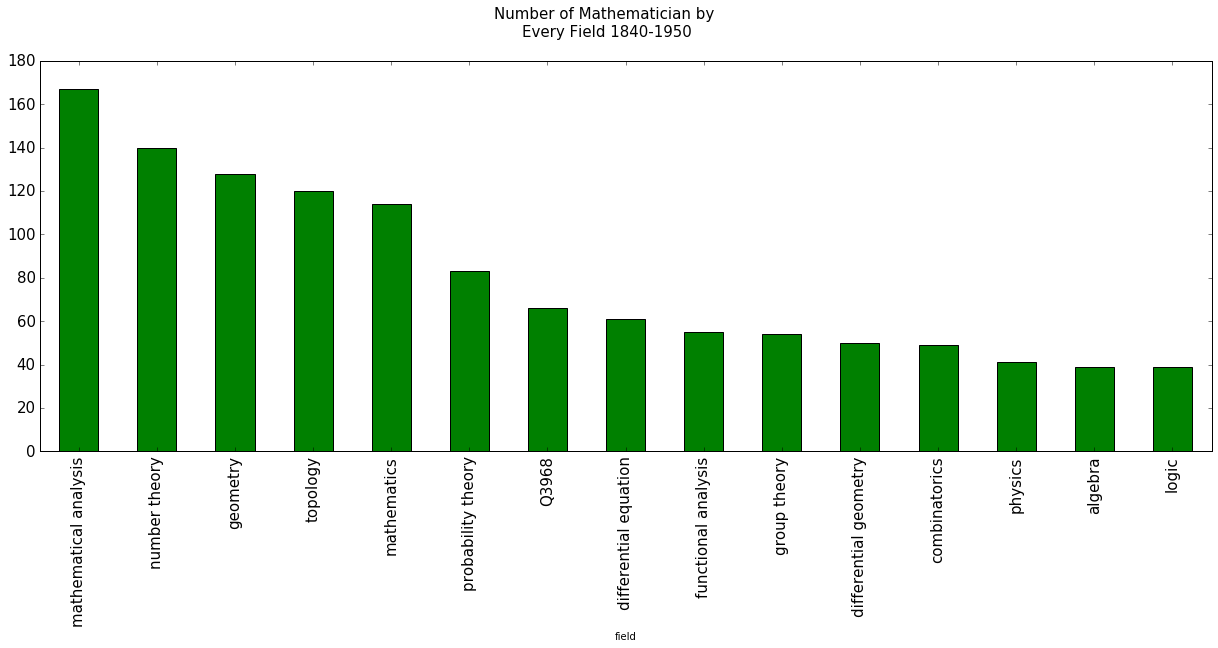

In [236]:
d_field=all_fow2_m.groupby('field').mathematicians.count()
d_field=d_field.sort_values(ascending=0)
# d_field[:15].plot(kind='bar',figsize=(21,7),title='Number of Mathematician by \nEvery Field \n1840-1950',color='g',fontsize=15)
d_field[:15].plot(kind='bar',figsize=(21,7),color='g',fontsize=15)
plt.figtext(.5,.95,'Number of Mathematician by \nEvery Field 1840-1950', fontsize=15, ha='center')

In [88]:
#by time
#by Country

### 7. Advisor and Student

In [12]:
# social graphs
# add the erdos number

In [13]:
dm_new7=pd.read_csv('matematician_data_cleaned4_1.csv')
len(dm_new7)

8596

In [14]:
dm_new7.columns

Index([u'mathematicians', u'occupation', u'country_of_citizenship',
       u'place_of_birth', u'date_of_death', u'educated_at', u'employer',
       u'place_of_death', u'member_of', u'employer.1', u'doctoral_advisor',
       u'languages_spoken,_written_or_signed', u'academic_degree',
       u'doctoral_student', u'manner_of_death', u'position_held',
       u'field_of_work', u'award_received', u'Erdos_Number', u'instance_of',
       u'sex_or_gender', u'approx._date_of_birth', u'day_of_birth',
       u'month_of_birth', u'year_of_birth', u'approx._date_of_death',
       u'day_of_death', u'month_of_death', u'year_of_death', u'n_gender',
       u'Approx_Age'],
      dtype='object')

In [15]:
# Create edge connection list for every mathematician
# because there is 'second doctoral advisor' and 'first doctoral advisor' on doctoral_advisor that seems used
# as mark first and second doctoral of the mathematician, we have to filter it
the_advisor=zip(dm_new7[~(dm_new7.doctoral_advisor.isnull())].doctoral_advisor.tolist(),
                dm_new7[~(dm_new7.doctoral_advisor.isnull())].mathematicians.tolist())
the_student=zip(dm_new7[~(dm_new7.doctoral_student.isnull())].mathematicians.tolist(),
                dm_new7[~(dm_new7.doctoral_student.isnull())].doctoral_student.tolist())

### the_advisor
the_advisor2=[]
for ta in the_advisor:
    try:
        la=ast.literal_eval(ta[0])
        for ad in la:
            if ad!='second doctoral advisor' and ad!='first doctoral advisor':
                the_advisor2.append((ad,ta[1]))
    except:
#         for "['Grigorii Mikhailo"
        ad=ta[0].replace("['","")
        the_advisor2.append((ad,ta[1]))


### the_student
the_student2=[]
for ts in the_student:
    try:
        lst=ast.literal_eval(ts[1])
        for st in lst:
            the_student2.append((ts[0],st))
    except:
        ts1=ts[1]+"']"
        lst=ast.literal_eval(ts1)
        for st in lst:
            the_student2.append((ts[0],st))

# This is the edge list
the_connecter=list(set(the_student2) | set(the_advisor2))

# Create the directed graph advisor to student fron edge list
dg=nx.DiGraph()
dg.add_edges_from(the_connecter)

# list all the mathematician who has max out degree
od1=dg.out_degree()
od2=pd.Series(od1)

od2.sort_values(ascending=0)[:10]

David Hilbert        23
Andrey Kolmogorov    23
Alonzo Church        20
Israel Gelfand       18
Ernst Kummer         15
Karl Weierstra├ƒ      15
Emmy Noether         15
Felix Klein          14
Edmund Landau        13
Nikolai Luzin        13
dtype: int64

In [16]:
# look at 'second doctoral advisor' and 'first doctoral advisor' (after the checking)
# dm_new7['sub_doctoral_advisor']=dm_new7['doctoral_advisor'].apply(lambda x: substring_in(str(x),'first doctoral advisor'))
# dm_new7[dm_new7['sub_doctoral_advisor']==1][['mathematicians','doctoral_advisor']]

In [17]:
def tree_of_mathematician(dg,centre):
    dg1=nx.bfs_tree(dg,centre)
    pos = graphviz_layout(dg1)
    plt.figure(figsize=(20,20))
    od=dg1.out_degree()

    color_map1=[]
    size_map1=[]
    label_ratio = 1.0/10.0
    pos_labels = {}

    nd=dg1.nodes()
    for n in nd:
        if n==centre:
            color_map1.append('white')
            size_map1.append((od[n]+3)*400)
        else:
            color_map1.append('blue')
            size_map1.append((od[n]+1)*100)
        x,y = pos[n]
        N = dg1[n]
        cx = sum(map(lambda x:pos[x][0], N)) / len(pos)
        cy = sum(map(lambda x:pos[x][1], N)) / len(pos)
        slopeY = (y-cy)
        slopeX = (x-cx)
        pos_labels[n] = (x+slopeX*label_ratio, y+slopeY*label_ratio)    

    nx.draw(dg1,pos,node_color = color_map1,node_size=size_map1, with_labels=False, arrows=True)
    nx.draw_networkx_labels(dg1,pos=pos_labels,font_size=15)
    # nx.draw_networkx_labels(dg1, pos_higher)
    # nx.draw
    plt.savefig(centre+' graph')

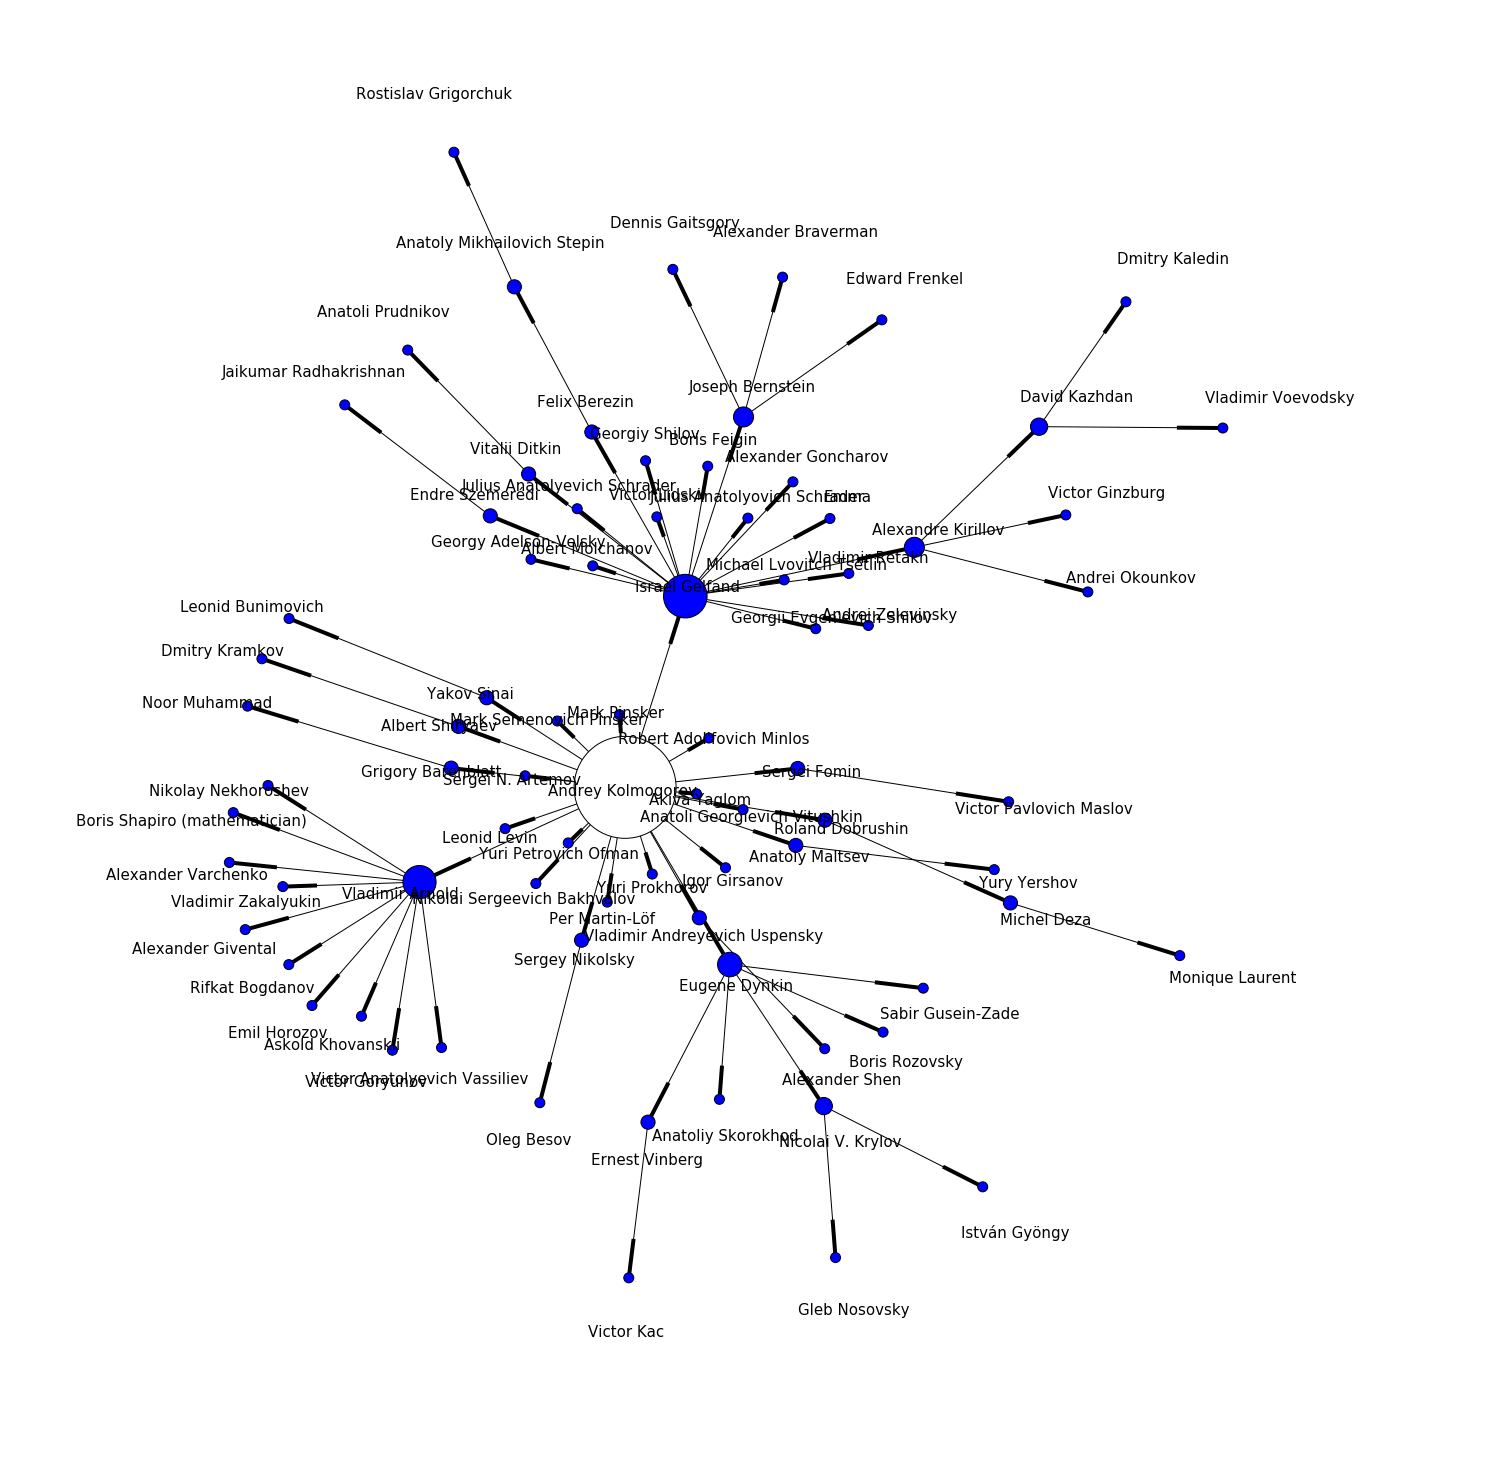

In [18]:
centre='Alonzo Church'
centre='Israel Gelfand'
centre='Andrey Kolmogorov'
tree_of_mathematician(dg,centre)